# **Minitrabalho 1 – Filtro colaborativo**

# **1) Algoritmo de força-bruta**

**1.a)** O algoritmo de força bruta consiste em utilizar 2 ciclos 'for' e passar por todos os elementos do array do outro utilizador.
No primeiro ciclo vai passar do 1º elemento até ao penúltimo e no segundo ciclo vai passar do 2º elemento até ao último elemento e vai verificar para cada indíce do primeiro se o valor é maior do que os restantes elementos, em que caso seja, aumentamos o número de inversões.

O pseudocódigo para este algoritmo pode ser escrito da seguinte forma:

```
brute_force_search(otherUserArray)
    numberOfInversions ← 0
    for i from 0 to length(otherUserArray) - 2
        for j from i + 1 to length(otherUserArray) - 1
            if otherUserArray[i] > otherUserArray[j] then
                numberOfInversions ← numberOfInversions + 1
    return numberOfInversions
```

**1.b)** Implementação do pseudocódigo acima em Python:

In [ ]:
def brute_force_search(otherUserArray):
  numberOfInversions = 0
  for i in range(len(otherUserArray) - 1):
    for j in range(i + 1, len(otherUserArray)):
      if otherUserArray[i] > otherUserArray[j]:
        numberOfInversions += 1
  return numberOfInversions

otherUserArray = [5,1,2,4,3]
numberOfInversions = brute_force_search(otherUserArray)
print("Number of inversions:", numberOfInversions)

Number of inversions: 5


**1.c)** O cálculo da análise assintótica é igual para todos os casos possíveis (pior, médio e melhor) e é definido (pelo número de acessos ao array) da seguinte forma:
      
$T(n) = \sum_{i=o}^{n-2} \sum_{j=i+1}^{n-1} 2$

 $= \sum_{i=o}^{n-2} 2 \sum_{j=i+1}^{n-1} 1$

 $= \sum_{i=o}^{n-2} [2 * (n - 1 -(i + 1) + 1) ]$

 $= 2 \sum_{i=o}^{n-2} (n - i - 1)$

 $= 2 * [(n - 1) * (n - 2)] / 2$

 $= (n - 1) * (n - 2)$

 $= n^2 - 3n + 2$

$T(n) = O(n^2 - 3n + 2)$ mas como $∀n ≥ 1, n^2 - 3n + 2 ≤ n^2$, então $n = O(n^2)$

Em baixo, colocámos um teste em código para um array de comprimento $100$, que mostra no final o número de acessos que são feitos ao array. Como o seu resultado foi $9900$ para um comprimento de $100$, isso reforça a nossa análise de que o nosso $O(n)$ é $O(n^2)$ visto que $100^2$ é igual a $10000$ e o resultado deu abaixo desse valor.

In [ ]:
def brute_force_search(otherUserArray):
    numberOfAccesses = 0
    for i in range(len(otherUserArray) - 1):
        for j in range(i + 1, len(otherUserArray)):
            numberOfAccesses += 2 # if otherUserArray[i] > otherUserArray[j]:
    return numberOfAccesses

otherUserArray = [i for i in range(100)]
accesses = brute_force_search(otherUserArray)
print(f"Number of accesses for array of size 100: {accesses}")

Number of accesses for array of size 100: 9900


# **2) Algoritmo dividir-e-conquistar**

**2.a)** A estratégia parte da utilização do algoritmo mergesort, pois é o mais eficiente dentro dos algoritmos 'divide to conquer' com $O(n*log(n))$.

O algoritmo começa por verificar se o lo é menor do que o hi, pois caso o lo seja maior ou igual do que o hi isso significa que o array já está ordenado, caso contrário, começa por encontrar o meio do array e dividi-lo em 2 partes (uma com a 1ª metade e outra com a 2ª metade) e vai executar a mesma função para cada uma dessas metades (assim conseguimos perceber se já existem partes dentro do array que estejam ordenadas).

O pseudocódigo para o algoritmo mergesort pode ser escrito da seguinte forma:

```
merge_sort(a, lo, hi)
    numberOfInversions ← 0
    if lo < hi:
        mid ← (lo + hi) // 2
        numberOfInversions ← numberOfInversions + merge_sort(a, lo, mid)
        numberOfInversions ← numberOfInversions + merge_sort(a, mid + 1, hi)
        numberOfInversions ← numberOfInversions + merge(a, lo, mid, hi)
    return numberOfInversions

merge(a, lo, mid, hi)
    i ← lo
    j ← mid + 1
    numberOfInversions ← 0
    aux[1...hi - lo + 1]
    
    for k from lo to hi do
        if j > hi:
            aux[k - lo] ← a[i]
            i ← i + 1
        else if i > mid:
            aux[k - lo] ← a[j]
            j ← j + 1
        else if a[i] < a[j]:
            aux[k - lo] ← a[i]
            i ← i + 1
        else:
            aux[k - lo] ← a[j]
            j ← j + 1
            numberOfInversions += (mid - i + 1)

    for k from lo to hi do
        a[k] ← aux[k - lo]

    return numberOfInversions
```

**2.b)** Implementação do pseudocódigo acima em Python:

In [ ]:
def merge_sort(a, lo, hi):
  numberOfInversions = 0

  if lo < hi:
      mid = (lo + hi) // 2
      numberOfInversions += merge_sort(a, lo, mid)
      numberOfInversions += merge_sort(a, mid + 1, hi)
      numberOfInversions += merge(a, lo, mid, hi)

  return numberOfInversions

def merge(a, lo, mid, hi):
  i = lo
  j = mid + 1
  aux = [0] * (hi - lo + 1)
  numberOfInversions = 0

  for k in range(lo, hi + 1):
      if j > hi:
          aux[k - lo] = a[i]
          i += 1
      elif i > mid:
          aux[k - lo] = a[j]
          j += 1
      elif a[i] < a[j]:
          aux[k - lo] = a[i]
          i += 1
      else:
          aux[k - lo] = a[j]
          j += 1
          numberOfInversions += (mid - i + 1)

  for k in range(lo, hi + 1):
      a[k] = aux[k - lo]

  return numberOfInversions

otherUserArray = [5,1,2,4,3]
numberOfInversions = merge_sort(otherUserArray, 0, len(otherUserArray) - 1)
print("Number of inversions:", numberOfInversions)

Number of inversions: 5


**2.c)** Para testarmos se o nosso algoritmo está correto, vamos utilizar o método de indução:

*   Hipótese de Indução: A sequência está ordenada por ordem crescente se o MergeSort devolver uma sequência de tamanho *i*.

*   Caso base: Consideremos *i*=1. Se o MergeSort devolver uma sequência de tamanho 0 ou 1, a sequência está ordenada, pois não se consegue alterar a posição desse elemento, visto que o mesmo é único ou não existe.

*   Passo de Indução: Consideremos que temos duas sequências obtidas no final de duas chamadas recursivas ao MergeSort, L and R, de tamanho [*i*/2]. Como [*i*/2] = *i*, pela hipótese de indução, ambas estão ordenadas por ordem crescente. Utilizando o merge, e como acabámos de provar, obtemos uma sequência ordenada de tamanho *length(L)* + *length(R)* = [*i*/2]+ [*i*/2] = *i* e, portanto, o Mergesort devolve uma sequência totalmente ordenada de tamanho *i*.

*   Conclusão: A hipótese indutiva é válida para qualquer *i* >= 0. Em particular, dada uma sequência de tamanho *i* = $n$, o MergeSort devolve uma permutação ordenada dessa sequência.

**2.d)** Vamos agora analisar assintoticamente o algoritmo, utilizando a técnica do Teorema Principal. Pelo que pudemos ver pelos documentos da UC de Desenho e Análise de Algoritmos, o algoritmo do MergeSort é dado por:

$T(n) = 2T(n/2) + O(n)$

E pelo Teorema temos que: $a = 2$ ; $b = 2$ ; $d = 1$ e $f(n) = Θ(n)$

Como $a = b^1$, então $T(n) = O(n * log(n))$

# **3) Análise Empírica**

**3.a)**



In [ ]:
import random
import time

tempos1=[]
tempos2=[]
for n in range(100, 1000, 10):
  arr = random.sample(range(n), n)
  aux1 = 0
  aux2 = 0
  for i in range(35):

    start_time = time.time()
    brute_force_search(arr)
    end_time = time.time()
    aux1+= end_time - start_time

    start_time = time.time()
    merge_sort(arr, 0, len(arr) - 1)
    end_time = time.time()
    aux2+= end_time - start_time

  tempos1.append(aux1/35)
  tempos2.append(aux2/35)


**3.b)**

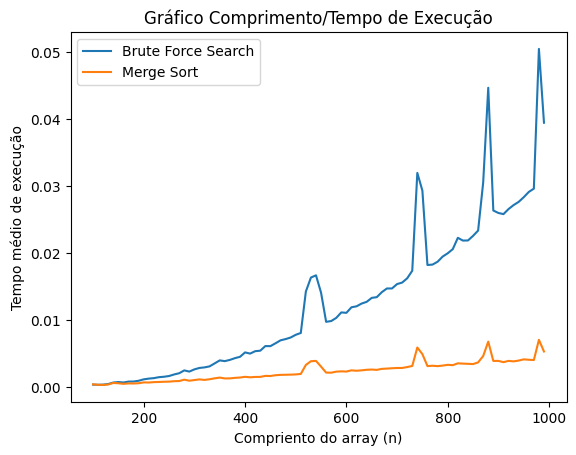

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(100, 1000, 10), tempos1, label='Brute Force Search')
plt.plot(range(100, 1000, 10), tempos2, label='Merge Sort')
plt.xlabel('Comprimento do array (n)')
plt.ylabel('Tempo médio de execução')
plt.title('Gráfico Comprimento/Tempo de Execução')
plt.legend()
plt.show()

# **4) Extra**

**4.a)** Possíveis melhorias para o algoritmo de MergeSort:

Reduzir o número de operações (comparações e número de acessos ao array) na função merge: A função de merge do primeiro algoritmo de MergeSort repete o número de acessos ao array em 2 'if's (dos 4 totais), o que pode ser melhorado ao passar para metade da quantidade dos mesmos.

In [ ]:
def merge_sort_2(a):
    if len(a) <= 1:
        return a, 0

    mid = len(a) // 2
    left_half, left_shifts = merge_sort_2(a[:mid])
    right_half, right_shifts = merge_sort_2(a[mid:])
    merged, merge_shifts = merge2(left_half, right_half)

    total_shifts = left_shifts + right_shifts + merge_shifts

    return merged, total_shifts

def merge2(lo, hi):
    merged = []
    left_index, right_index = 0, 0
    shifts = 0

    while left_index < len(lo) and right_index < len(hi):
        if lo[left_index] <= hi[right_index]:
            merged.append(lo[left_index])
            left_index += 1
        else:
            merged.append(hi[right_index])
            right_index += 1
            shifts += len(lo) - left_index


    merged.extend(lo[left_index:])
    merged.extend(hi[right_index:])

    return merged, shifts

otherUserArray = [5,1,2,4,3]
sorted_arr, shifts = merge_sort_2(otherUserArray)
print("Number of shifts:", shifts)

Number of shifts: 5


In [ ]:
import random
import time

tempos1=[]
tempos2=[]
for n in range(100, 1000, 10):
  arr = random.sample(range(n), n)
  aux1 = 0
  aux2 = 0
  for i in range(35):

    start_time = time.time()
    merge_sort(arr, 0, len(arr) - 1)
    end_time = time.time()
    aux1+= end_time - start_time

    start_time = time.time()
    merge_sort_2(arr)
    end_time = time.time()
    aux2+= end_time - start_time

  tempos1.append(aux1/35)
  tempos2.append(aux2/35)

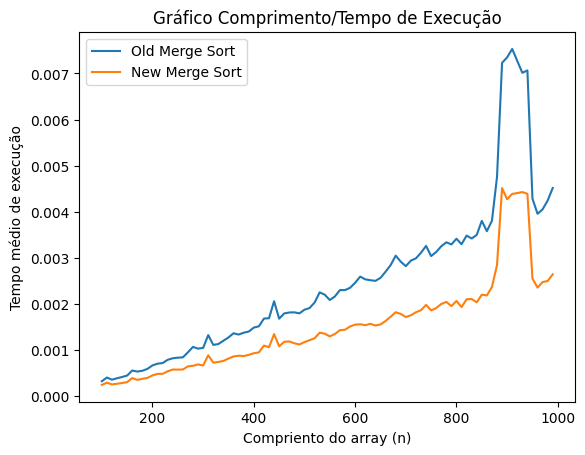

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(100, 1000, 10), tempos1, label='Old Merge Sort')
plt.plot(range(100, 1000, 10), tempos2, label='New Merge Sort')
plt.xlabel('Comprimento do array (n)')
plt.ylabel('Tempo médio de execução')
plt.title('Gráfico Comprimento/Tempo de Execução')
plt.legend()
plt.show()

# **5) Questões Éticas**

**5.a)** Não houve colaboração com nenhum aluno externo ao grupo.

**5.b)** O Minitrabalho foi realizado com base nos documentos da UC de Desenho e Análise de Algoritmos.